In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from keras.models import Sequential
from keras import layers
import keras

2025-02-15 12:33:46.811144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739619226.825069   46610 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739619226.829196   46610 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-15 12:33:46.842509: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
PATH_DESCRIPTIONS_CLEAN = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/topic_modeling/data/episodes_description_nouns.csv"
PATH_IMDB_RATINGS_CLEAN = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/data/episodes.json"


df_descriptions = pd.read_csv(PATH_DESCRIPTIONS_CLEAN)
df_imdb_ratings = pd.read_json(PATH_IMDB_RATINGS_CLEAN , orient="index")
df_descriptions


,Unnamed: 0,title,text
0,0,Pilot,middle night rick bursts morty room surprise v...
1,1,Lawnmower Dog,jerry family dog snuffles rick jerry device do...
2,2,Anatomy Park (Episode),christmas jerry idea holiday rest family hispa...
3,3,M. Night Shaym-Aliens!,episode rick rat garage workmanship morty day ...
4,4,Meeseeks and Destroy,mr meeseeks beth adventure morty adventures ri...
...,...,...,...
76,76,Mercy Kill,planet supernova vance aliens deaths innocents...
77,77,Girls Night,bar calypso diablo verde lady katana supernova...
78,78,Kintsugi,planet somber alan rails vase glue cracks gold...
79,79,Little Trains,doom nomitron earth satellite supernova news r...


In [3]:
df_descriptions["rating"] = pd.Series(list(df_imdb_ratings["rating"]))
df = df_descriptions
df = df.dropna()
df

,Unnamed: 0,title,text,rating
0,0,Pilot,middle night rick bursts morty room surprise v...,7.9
1,1,Lawnmower Dog,jerry family dog snuffles rick jerry device do...,8.6
2,2,Anatomy Park (Episode),christmas jerry idea holiday rest family hispa...,8.3
3,3,M. Night Shaym-Aliens!,episode rick rat garage workmanship morty day ...,8.6
4,4,Meeseeks and Destroy,mr meeseeks beth adventure morty adventures ri...,9.0
...,...,...,...,...
66,66,Rickfending Your Mort,morty rick stupor floor garage defeatingrick p...,7.8
67,67,Wet Kuat Amortican Summer,rick chores morty mind blowers summer rick att...,6.4
68,68,Rise of the Numbericons: The Movie,episode way post scene schwifty ice alphebetri...,4.5
69,69,Mort: Ragnarick,jerry void light front nana jerry pop pop rick...,7.9


In [4]:
df["evaluation"] = (df["rating"] > 8.2).astype(int)
df

/tmp/ipykernel_46610/3675656629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["evaluation"] = (df["rating"] > 8.2).astype(int)


,Unnamed: 0,title,text,rating,evaluation
0,0,Pilot,middle night rick bursts morty room surprise v...,7.9,0
1,1,Lawnmower Dog,jerry family dog snuffles rick jerry device do...,8.6,1
2,2,Anatomy Park (Episode),christmas jerry idea holiday rest family hispa...,8.3,1
3,3,M. Night Shaym-Aliens!,episode rick rat garage workmanship morty day ...,8.6,1
4,4,Meeseeks and Destroy,mr meeseeks beth adventure morty adventures ri...,9.0,1
...,...,...,...,...,...
66,66,Rickfending Your Mort,morty rick stupor floor garage defeatingrick p...,7.8,0
67,67,Wet Kuat Amortican Summer,rick chores morty mind blowers summer rick att...,6.4,0
68,68,Rise of the Numbericons: The Movie,episode way post scene schwifty ice alphebetri...,4.5,0
69,69,Mort: Ragnarick,jerry void light front nana jerry pop pop rick...,7.9,0


In [5]:
#train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])
train , test = np.split(df.sample(frac=1), [int(0.8*len(df))])
len(test)

/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


15

In [6]:
test

,Unnamed: 0,title,text,rating,evaluation
57,57,Full Meta Jackrick,episode recap sequence rick rick morty leon cr...,7.8,0
66,66,Rickfending Your Mort,morty rick stupor floor garage defeatingrick p...,7.8,0
60,60,Ricktional Mortpoon's Rickmas Mortcation,christmas day rick family space beth gifts mul...,8.0,0
5,5,Rick Potion 9,morty jessica opportunity attempts brad flu se...,9.1,1
33,33,One Crew Over the Crewcoo's Morty,end morty adventure tomb temple rick loot arti...,8.2,0
65,65,Unmortricken,flashback morty past betrayal rick killing ric...,9.2,1
31,31,Edge of Tomorty: Rick Die Rickpeat,morty death jessica age.the smith family break...,8.9,1
27,27,The Ricklantis Mixup,rick morty atlantis rick morty pair donations ...,9.8,1
51,51,Solaricks,remains citadel events episode rick morty spac...,8.5,1
41,41,Mort Dinner Rick Andre,rick morty escape dimension ship controls repa...,9.0,1


In [7]:
X_train = train["text"]
#X_val = val["text"]
X_test = test["text"]

Y_train = train["evaluation"]
#Y_val = val["evaluation"]
Y_test = test["evaluation"]

Y_train_reg = train["rating"] 
#Y_val_reg = val["rating"] * 100
Y_test_reg = test["rating"] 


print(Y_test_reg)

57    7.8
66    7.8
60    8.0
5     9.1
33    8.2
65    9.2
31    8.9
27    9.8
51    8.5
41    9.0
4     9.0
42    8.7
56    7.8
54    8.5
50    9.3
Name: rating, dtype: float64


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

td = TfidfVectorizer(max_features = 350)
X = td.fit_transform(df["text"].values).toarray()

In [9]:
embedded_x_train = td.fit_transform(X_train.values).toarray()
embedded_x_test = td.fit_transform(X_test.values).toarray()
embedded_test = td.fit_transform([("Hello I am Donald J Trump" * 500)] )
embedded_test

<1x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

## Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(embedded_x_train, Y_train)

MultinomialNB()

In [11]:
y_pred = classifier.predict(embedded_x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

## Neural Net

In [12]:
model = Sequential()
model.add(layers.Dense(100, input_shape=(350,) , activation='relu'))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-15 12:33:48.571183: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [14]:
model.fit(np.array(embedded_x_train), np.array(Y_train), epochs=160, batch_size=10)

Epoch 1/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5144 - loss: 0.6926
Epoch 2/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5290 - loss: 0.6912 
Epoch 3/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6170 - loss: 0.6902 
Epoch 4/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6197 - loss: 0.6899 
Epoch 5/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7435 - loss: 0.6883 
Epoch 6/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8110 - loss: 0.6872 
Epoch 7/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8178 - loss: 0.6870 
Epoch 8/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9241 - loss: 0.6844 
Epoch 9/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8534 - loss: 0.6842 
Epoch 10/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9209 - loss: 0.6821 
Epoch 11/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9185 - loss: 0.6806 
Epoch 12/160
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9253 - loss

In [15]:
test_results_nn = model.predict(embedded_x_test)
test_results_nn = [x[0] for x in test_results_nn]
test_results_nn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[0.18162644,
 0.06832759,
 0.62219965,
 0.0023922818,
 0.066520475,
 0.0016202729,
 0.0034716062,
 0.0022503762,
 0.0016836623,
 0.89840555,
 0.000771169,
 0.020953389,
 0.8463083,
 0.04221656,
 0.005141708]

In [16]:
Y_test

57    0
66    0
60    0
5     1
33    0
65    1
31    1
27    1
51    1
41    1
4     1
42    1
56    0
54    1
50    1
Name: evaluation, dtype: int64

In [17]:
model.predict(embedded_x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.8162644e-01],
       [6.8327591e-02],
       [6.2219965e-01],
       [2.3922818e-03],
       [6.6520475e-02],
       [1.6202729e-03],
       [3.4716062e-03],
       [2.2503762e-03],
       [1.6836623e-03],
       [8.9840555e-01],
       [7.7116903e-04],
       [2.0953389e-02],
       [8.4630829e-01],
       [4.2216562e-02],
       [5.1417081e-03]], dtype=float32)

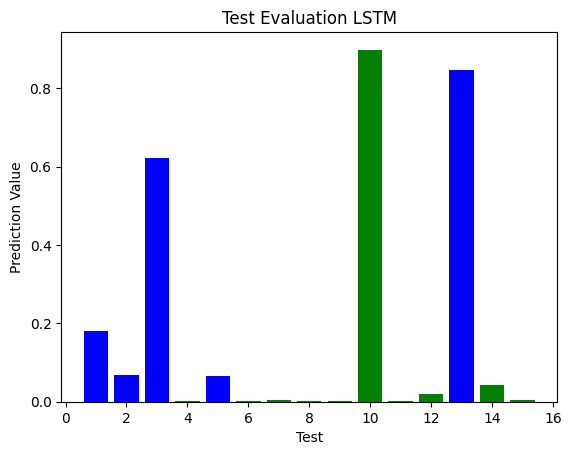

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.array(range(len(test_results_nn))) + 1

colors = ["green" if y==1 else "blue" for y in Y_test] # Green = Good Episode

plt.bar(x_axis, test_results_nn , color=colors)
plt.title('Test Evaluation LSTM')
plt.xlabel('Test')
plt.ylabel('Prediction Value')
plt.show()

### Classification with Bag of Words

In [19]:
vect = CountVectorizer(max_features= 350)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
#X_test_dtm.todense()[0]
vect.get_feature_names_out()

array(['137', 'acid', 'actions', 'ad', 'adventure', 'adventures', 'after',
       'agency', 'agent', 'agents', 'air', 'alien', 'aliens', 'app',
       'argument', 'arm', 'arrive', 'arthricia', 'as', 'at', 'attacks',
       'attempt', 'attempts', 'attention', 'audience', 'baby', 'back',
       'balthromaw', 'bar', 'bathroom', 'battle', 'belt', 'beth', 'beths',
       'bigfoot', 'bird', 'birdperson', 'blood', 'bodies', 'body', 'bomb',
       'bond', 'box', 'brain', 'break', 'breakfast', 'bruce', 'building',
       'cable', 'call', 'car', 'cat', 'ceiling', 'chaos', 'child',
       'children', 'chuxly', 'citadel', 'class', 'click', 'clone',
       'collar', 'conductor', 'conference', 'control', 'conversation',
       'cookies', 'council', 'cream', 'creature', 'credit', 'credits',
       'crows', 'crystal', 'daughter', 'day', 'death', 'deer', 'demons',
       'device', 'diane', 'dimension', 'director', 'disgust', 'doctor',
       'dog', 'door', 'dr', 'dragon', 'dreams', 'duo', 'earth', 'egg

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb_model =  GaussianNB()
gnb_model.fit(X_train_dtm.toarray() , Y_train )

GaussianNB()

In [21]:
y_pred = gnb_model.predict(X_test_dtm.toarray())

In [22]:
Y_test

57    0
66    0
60    0
5     1
33    0
65    1
31    1
27    1
51    1
41    1
4     1
42    1
56    0
54    1
50    1
Name: evaluation, dtype: int64

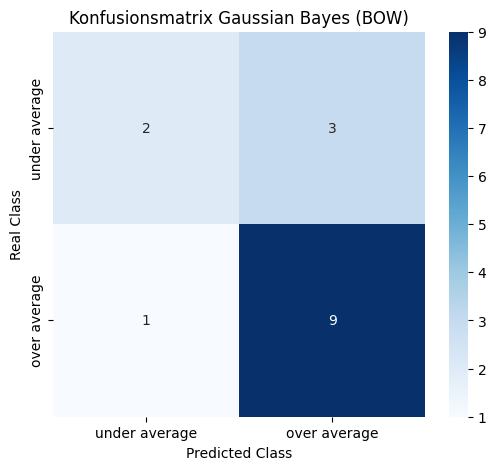

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.75      0.90      0.82        10

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Konfusionsmatrix berechnen
cm = confusion_matrix(Y_test, y_pred)


# Anzeige der Konfusionsmatrix mit seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["under average","over average"], yticklabels=["under average","over average"])
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.title("Konfusionsmatrix Gaussian Bayes (BOW)")
plt.show()
print(classification_report(Y_test, y_pred))

### Classification TF IDF Gauss

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

td = TfidfVectorizer(max_features = 250)
X_train_tf_idf = td.fit_transform(X_train).toarray()
X_test_tf_idf = td.fit_transform(X_test).toarray()

In [25]:
gnb_model_tf_idf =  GaussianNB()
gnb_model_tf_idf.fit(X_train_tf_idf , Y_train )

GaussianNB()

In [26]:
y_pred = gnb_model_tf_idf.predict(X_test_tf_idf)

In [27]:
Y_test

57    0
66    0
60    0
5     1
33    0
65    1
31    1
27    1
51    1
41    1
4     1
42    1
56    0
54    1
50    1
Name: evaluation, dtype: int64

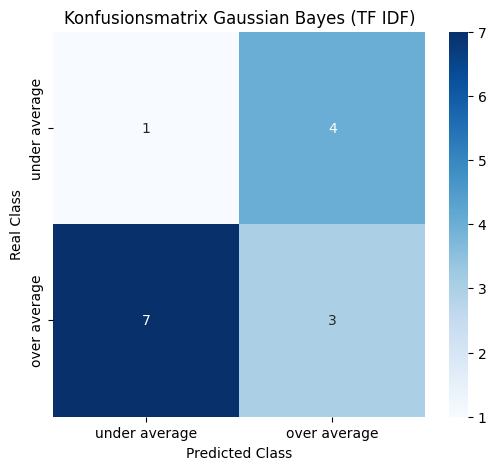

              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.43      0.30      0.35        10

    accuracy                           0.27        15
   macro avg       0.28      0.25      0.25        15
weighted avg       0.33      0.27      0.29        15



In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Konfusionsmatrix berechnen
cm = confusion_matrix(Y_test, y_pred)


# Anzeige der Konfusionsmatrix mit seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["under average","over average"], yticklabels=["under average","over average"])
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.title("Konfusionsmatrix Gaussian Bayes (TF IDF)")
plt.show()
print(classification_report(Y_test, y_pred))

In [29]:
df["len"] = [len(x) for x in df["text"]]
df.corr(numeric_only = True)

/tmp/ipykernel_46610/1226664471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len"] = [len(x) for x in df["text"]]


,Unnamed: 0,rating,evaluation,len
Unnamed: 0,1.000000,-0.438012,-0.412393,-0.088136
rating,-0.438012,1.000000,0.722851,0.210899
evaluation,-0.412393,0.722851,1.000000,0.113258
len,-0.088136,0.210899,0.113258,1.000000


### Regression

### TF IDF

In [30]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(X_train_tf_idf , Y_train_reg )
Y_pred_reg = reg.predict(X_test_tf_idf)

In [31]:
Y_test_reg

57    7.8
66    7.8
60    8.0
5     9.1
33    8.2
65    9.2
31    8.9
27    9.8
51    8.5
41    9.0
4     9.0
42    8.7
56    7.8
54    8.5
50    9.3
Name: rating, dtype: float64

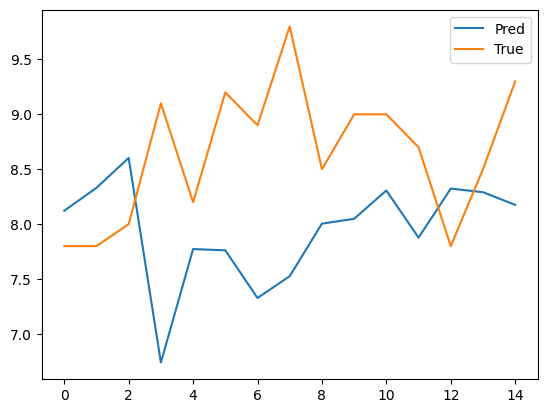

In [32]:
plt.plot( range(len(Y_pred_reg)),Y_pred_reg , label="Pred")
plt.plot(range(len(Y_pred_reg)), Y_test_reg , label="True")
plt.legend()

In [33]:
from sklearn.metrics import mean_absolute_error , explained_variance_score

In [34]:
mean_absolute_error(Y_test_reg ,Y_pred_reg )

0.956435784857393

In [35]:
explained_variance_score(Y_test_reg ,Y_pred_reg )

-1.391945745805657

In [36]:
reg.predict(td.transform(["spaghetti rick pluto"]))

array([7.59592708])

In [37]:
td.get_feature_names_out()

array(['137', '22', 'adventure', 'adventures', 'after', 'arms', 'attempt',
       'attempts', 'back', 'bar', 'beth', 'bootleg', 'bottle', 'box',
       'brad', 'brain', 'caan', 'campaign', 'car', 'cards', 'chaos',
       'character', 'christmas', 'churry', 'citadel', 'clips', 'club',
       'control', 'cop', 'core', 'council', 'couple', 'court',
       'creatures', 'credit', 'credits', 'crew', 'cronenberg', 'crowd',
       'crows', 'cruiser', 'crystal', 'crystals', 'curve', 'dale',
       'dance', 'date', 'day', 'deal', 'death', 'deaths', 'decoy',
       'decoys', 'destruction', 'device', 'diane', 'dimension', 'dinner',
       'dinosaurs', 'dishes', 'door', 'drive', 'earth', 'efforts', 'end',
       'episode', 'escape', 'events', 'fact', 'family', 'fight', 'finite',
       'floor', 'flu', 'fluid', 'fondness', 'fortress', 'front', 'fruit',
       'galaxy', 'gallery', 'game', 'garage', 'giant', 'glasses',
       'glockenspiel', 'god', 'golf', 'ground', 'group', 'gun', 'hand',
       'han

### Linear Regression with Feature importance

In [38]:
!pip install statsmodels

In [39]:
import statsmodels.api as sm

model = sm.OLS(Y_train_reg,X_train_tf_idf)
results = model.fit()


In [40]:
eval_df = pd.DataFrame({
    "feature" : td.get_feature_names_out(),
    "coeff" : results.params,
    "t_val" : results.tvalues
})

In [41]:
eval_df.sort_values("coeff" , ascending=False).head(20)

,feature,coeff,t_val
x175,president,8.821506,0.0
x202,saber,5.209245,0.0
x153,one,4.810728,0.0
x24,churry,4.542387,0.0
x231,time,4.510295,0.0
x222,suit,4.186404,0.0
x230,things,4.167846,0.0
x44,curve,4.155876,0.0
x196,rift,4.114602,0.0
x124,lord,3.994916,0.0


In [42]:
eval_df.sort_values("coeff" , ascending=True).head(20)

,feature,coeff,t_val
x54,destruction,-2.168899,-0.0
x94,head,-2.116017,-0.0
x220,success,-1.995059,-0.0
x29,cop,-1.455023,-0.0
x238,version,-1.347783,-0.0
x98,him,-1.310323,-0.0
x69,fact,-1.238303,-0.0
x123,locos,-1.191900,-0.0
x108,jellybean,-1.096124,-0.0
x204,scene,-1.040677,-0.0


Text(0.5, 1.0, 'Mortytown ')

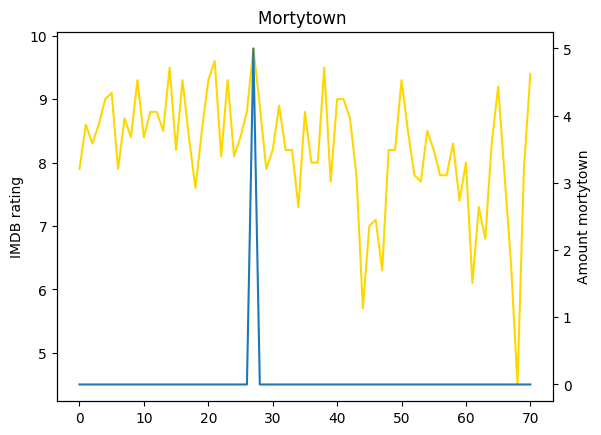

In [59]:
amount_word = [s.count("mortytown") for s in df["text"]]

fig, ax = plt.subplots()

ax1 = ax.twinx()

ax.plot(df["rating"] , color="gold")
ax1.plot(amount_word)
ax1.set_ylabel("Amount mortytown")
ax.set_ylabel("IMDB rating")
ax.set_title("Mortytown ")
